# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from scipy import stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\SIT\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


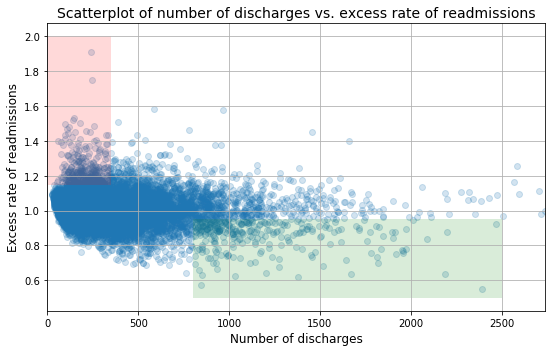

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### Question A

I saw the following limitations in the above recommendations:

1. There is no statistical test being done to proof that discharge rates correlate (positive or negative) with excess admission.
2. It was unclear that how expected readmission rate was calculated, and whether it is a representable benchmark to calculate excess readmission ratio.
3. The success rate is being determined by median, which may lead to bias for samples with skewed distribution are not normally distributed
3. Only count Medicare patient could be biased, as small hospitals, being private practices, may not accept Medicare patients, hence the discharge rates would generally be less, and that may skew up its readmission rates due to lower sample size.

In [5]:
explore_hospital = clean_hospital_read_df[81:]
explore_hospital.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013
1853,KAISER FOUNDATION HOSPITAL-SANTA CLARA,50071,CA,READM-30-HF-HRRP,29,NaN,1.0908,21.0,19.3,11.0,07/01/2010,06/30/2013
1290,PALMERTON HOSPITAL,390019,PA,READM-30-AMI-HRRP,30,NaN,1.1123,23.2,20.9,13.0,07/01/2010,06/30/2013


In [6]:
# Extract relevant data from the dataset to validate their statistical relationship
discharge = explore_hospital['Number of Discharges']
readmission = explore_hospital['Number of Readmissions']
excess_adm = explore_hospital['Excess Readmission Ratio']
excess_adm_100 = explore_hospital[explore_hospital['Number of Discharges'] < 100]['Excess Readmission Ratio']
excess_adm_1000 = explore_hospital[explore_hospital['Number of Discharges'] >1000]['Excess Readmission Ratio']
excess_adm_100_1000 = explore_hospital[(explore_hospital['Number of Discharges'] <=1000) & (explore_hospital['Number of Discharges'] >=100)]['Excess Readmission Ratio']
print(np.mean(excess_adm_100))
print(np.mean(excess_adm_1000))

1.0226183501683506
0.9783354211663071


The mean excess readmission rate figures are correct.

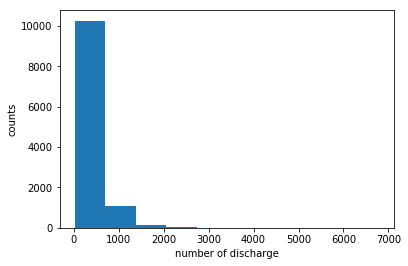

In [7]:
# plot histogram to observe the distrbution of discharge and readmission
_ = plt.hist(discharge)
_ = plt.xlabel('number of discharge')
_ = plt.ylabel('counts')
plt.show()

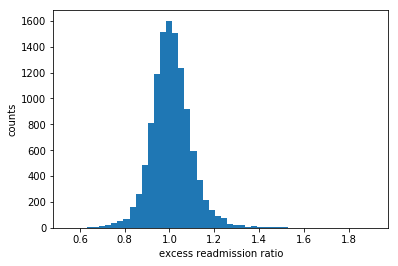

In [8]:
_ = plt.hist(excess_adm, bins=50)
_ = plt.xlabel('excess readmission ratio')
_ = plt.ylabel('counts')
plt.show()

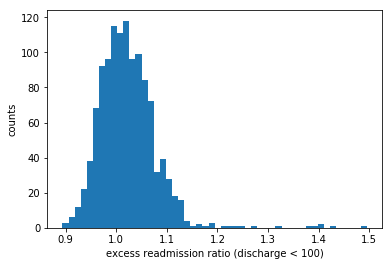

In [9]:
_ = plt.hist(excess_adm_100, bins=50)
_ = plt.xlabel('excess readmission ratio (discharge < 100)')
_ = plt.ylabel('counts')
plt.show()

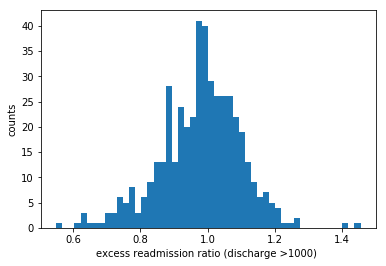

In [10]:
_ = plt.hist(excess_adm_1000, bins=50)
_ = plt.xlabel('excess readmission ratio (discharge >1000) ')
_ = plt.ylabel('counts')
plt.show()

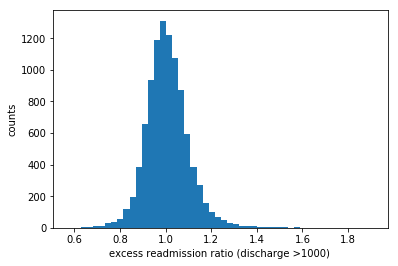

In [11]:
_ = plt.hist(excess_adm_100_1000, bins=50)
_ = plt.xlabel('excess readmission ratio (discharge >1000) ')
_ = plt.ylabel('counts')
plt.show()

In [12]:
# Access if the both data set are normally distributed
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

In [13]:
def normal_view(dataset):
    mu = np.mean(dataset)
    sigma = np.std(dataset)
    samples = np.random.normal(mu, sigma, 10000)
    x, y = ecdf(dataset)
    x_theor, y_theor = ecdf(samples)
    _ = plt.plot(x, y, marker='.', linestyle='none', label='original data')
    _ = plt.plot(x_theor, y_theor, label='sample data')
    _ = plt.xlabel('count')
    _ = plt.ylabel('probability')
    _ = plt.legend(loc='best')
    plt.show()

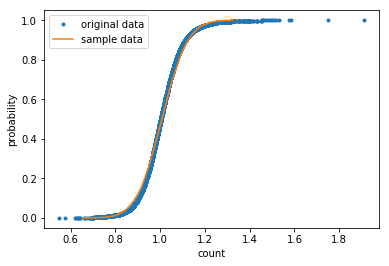

In [14]:
normal_view(excess_adm)

Hypothesis test to access whether the correlation between discharge rates and re-admission rate are statistically significant.

**Null Hypothesis** - discharges rate and re-admission do not have correlation (i.e. beta = 0)

**Alternate Hypothesis** - discharge rate and re-admission rate correlate (i.e. beta < 0 or beta > 0)

In [15]:
Pearson, p_value = stats.pearsonr(discharge, excess_adm)
print('p_value.{:.2f}'.format(p_value))

p_value.0.00


Small p-value confirm that discharge rate is correlated to excess_adm

In [16]:
# verify if the correlation is positive or negative
np.corrcoef(discharge, excess_adm)

array([[ 1.        , -0.09739794],
       [-0.09739794,  1.        ]])

It turns out that the variable are only slightly correlation. The conclusion made by the study may not have practical significance.

In [17]:
np.corrcoef(discharge, readmission)

array([[1.        , 0.79127241],
       [0.79127241, 1.        ]])

It is valid that discharge and readmission are significantly correlated.

With regarding the mean excess rate between hospital with discharge < 100 and those > 1000, the difference is only 0.045, which translate to only 1 additional readmission difference out of 1000 readmission. That could happen by chance not necessarily have any practical significance in evaluating hospital quality of care

The conclusion on smaller facility/hospital providing lower quality service is also not persuasive. Smaller hospital will not have enough space/equipment to carry out complex procedures like big hospitals do. That does not mean their qualities are bad. The number of discharge/readmission do not speak for patients satisfication 